In [1]:
# Jonathan Plavnik, CMOR220, Fall 2025, Project 5
# project6_complex_newtons.m
# we will dissect the accuracy of Newton’s Method applied to a polynomial
# by first assigning each root a color. Then, depending on where Newton’s method
# takes us we paint accordingly. For example, if Newton’s Method takes us to the
# first root, we paint it red; if the method takes us to the other root, we paint
# it blue; if Newton’s Method fails, we paint the point white. As the method has
# a much better chance of failing in the complex plane, we will produce a number
# of gorgeous Newton wastelands. We will run the code on four given polynomials
# and plot the resulting figures.
# Last modified: November 3, 2025


# Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# function description

def qnewt(q, xt, yt, maxiter):
  # list of inputs: q, an array of 5 complex coefficients of a quartic
  # polynomial xt, an array of 3 x grid values, xlo, xinc and xhi, yt,
  # an array of 3 y grid values, ylo, yinc and yhi, maxiter, the maximum number
  # of iterations
  # list of outputs: figure plotting wastelands and basins for newtons for the
  # given inputs

  # intialize
  polynomial = np.array(q, dtype = complex) # vectorized poly
  derivative = myownpolyder(q) # home made myownpolyder as requested

  # create grid
  a = np.arange(xt[0], xt[2], xt[1])
  b = np.arange(yt[0], yt[2], yt[1])
  [A, B] = np.meshgrid(a, b)
  X0 = A + 1j*B

  #Iteration
  for i in range(0, maxiter):
    # Newtons method
    X0 = X0 - np.polyval(polynomial, X0) / np.polyval(derivative, X0)
  # assign colors
  colors = ["crimson", "blue", "turquoise", "midnightblue", "aquamarine"]
  r = np.roots(polynomial)

  # Plotting

  plt.figure()
  for i in range(len(r)):
      rows, cols = np.where(np.abs(X0 - r[i]) < 0.01)
      plt.plot(a[cols], b[rows], ".", color = colors[i], markersize = 1)

  plt.title("A Newton Basin of 6z^5 - 3z^4 + 3iz^2 - 4")
  plt.title("A Newton Basin of " + poly_to_string(q))
  plt.xlabel("Real Component")
  plt.ylabel("Imaginary Component")
  plt.show()




In [3]:
# given a polynomial, return
def myownpolyder(q):
  # list of inputs: polynomial coefficients of q
  # list of outputs: list of coefficeints of derivative of q
  return np.array([(len(q) - i - 1) * q[i] for i in range(len(q) - 1)],
                  dtype=complex)
  # find derivative of polynomial and vectorize it


In [4]:
# convert the list q to a string which we can use for the title

def poly_to_string(q):
  # list of inputs: list of coeffs for polynomial q
  # list of outputs: string displaying the polynomial input q which we will then
  # use for title of figures
  s, n = "", len(q)
  for i, a in enumerate(q):
      p = n - i - 1
      # skip if 0
      if a == 0:
          continue

      # assign sigen to coeff
      if isinstance(a, complex) and a.real == 0:
          sgn_plus = a.imag > 0
          coef_str = f"{abs(a.imag)}i"
      else:
          sgn_plus = a.real > 0
          coef_str = ("" if abs(abs(a) - 1) < 1e-12 and p != 0 else str(abs(a)))

      # make necessary adjustments for complex values
      if p == 0:
          term = coef_str
      elif p == 1:
          term = f"{coef_str}z"
      else:
          term = f"{coef_str}z^{p}"

      s += ("" if not s else (" + " if sgn_plus else " - ")) + term

  return f"${s}$"




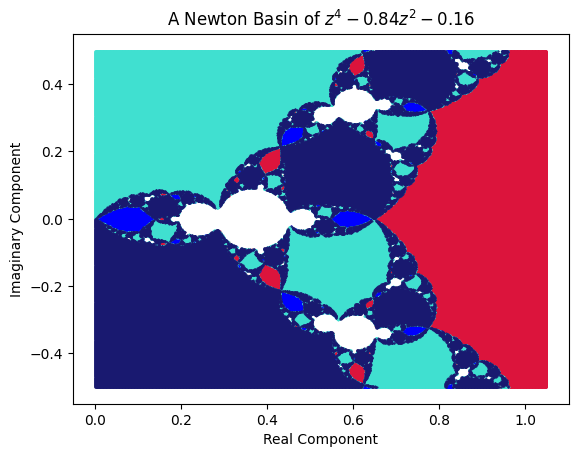

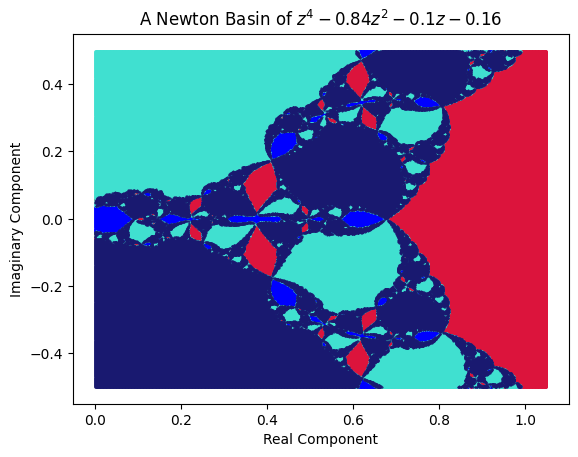

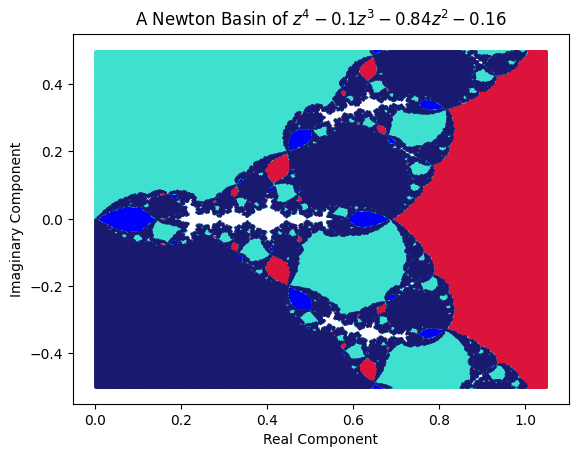

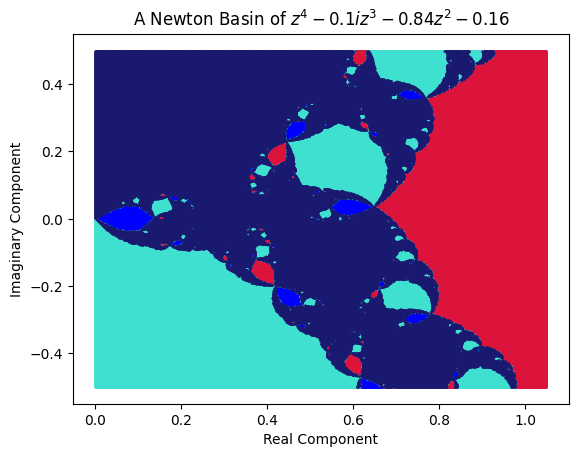

In [5]:
# Run Inputs
qnewt([1, 0, -0.84, 0, -0.16],[0, .001, 1.05],[-0.5, .001, 0.5],20)
qnewt([1, 0, -0.84, -0.1, -0.16],[0, .001, 1.05],[-0.5, .001, 0.5],20)
qnewt([1, -0.1, -0.84, 0, -0.16],[0, .001, 1.05],[-0.5, .001, 0.5],20)
qnewt([1, -0.1j, -0.84, 0, -0.16],[0, .001, 1.05],[-0.5, .001, 0.5],20)